In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from evaluate_prf1 import evaluate_prf1

In [10]:
# def prf1_plot(precisions, recalls, f1s, assoc_reqs):
#     fig, ax = plt.subplots(1,3)
#     ax[0].plot(assoc_reqs, precisions, label='Precision')
#     ax[1].plot(assoc_reqs, recalls, label='Recall')
#     ax[2].plot(assoc_reqs, f1s, label='F1')
#     return ax
    
def prf1_sweep(pkl_path, req_overlap=0.5):
    pkl_file = open(pkl_path, 'rb')
    overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat = pickle.load(pkl_file)
    assoc_reqs = np.arange(4, 20)
    precisions = []
    recalls = []
    f1s = []
    for req_assoc in assoc_reqs:
        precision, recall, f1 = evaluate_prf1(overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat, req_err_ang=3., req_err_dist=1.5, req_overlap=req_overlap, req_assoc=req_assoc)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
    # return precisions, recalls, f1s, assoc_reqs
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].plot(assoc_reqs, precisions, label='Precision')
    ax[1].plot(assoc_reqs, recalls, label='Recall')
    ax[2].plot(assoc_reqs, f1s, label='F1')
    ax[0].set_title('Precision')
    ax[1].set_title('Recall')
    ax[2].set_title('F1')
    ax[0].set_xlabel('Required Associations')
    ax[1].set_xlabel('Required Associations')
    ax[2].set_xlabel('Required Associations')
    return precisions, recalls, f1s, assoc_reqs

In [11]:
# results_dir = "/home/masonbp/results/west_point_2023/segment_align/06_for_pr/acl_jackal2_sparkal1"
# req_overlap=0.5
results_dir = "/home/masonbp/results/west_point_2023/segment_align/08_erosion/sparkal2_sparkal1"
req_overlap = 0.6
methods = ["gravity", "point2d", "point3d", "vol2d", "vol3d", "volgrav"]

Method: gravity
Best F1: 0.288135593220339 at 8 associations


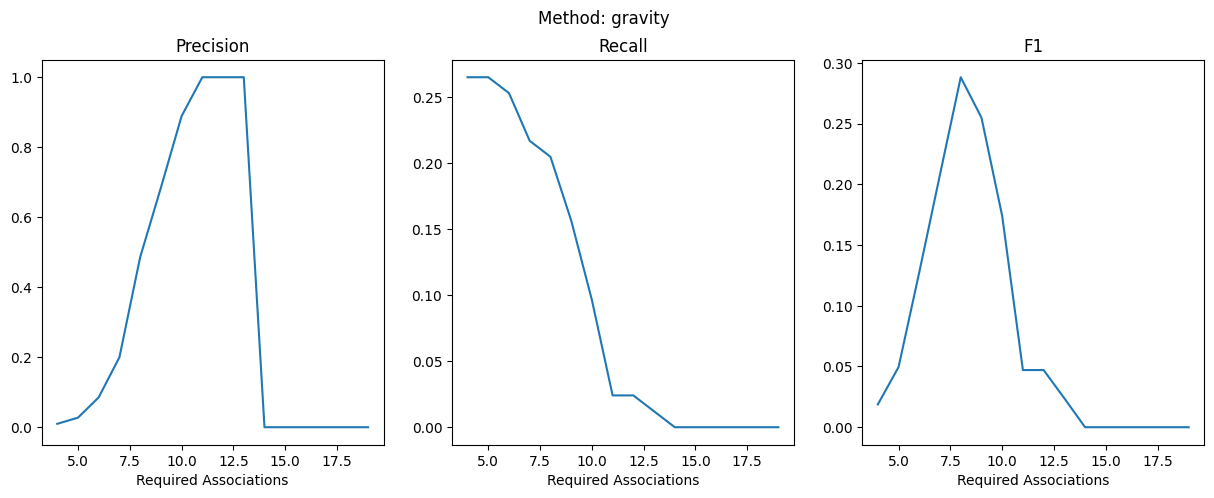

Method: point2d
Best F1: 0.15873015873015872 at 10 associations


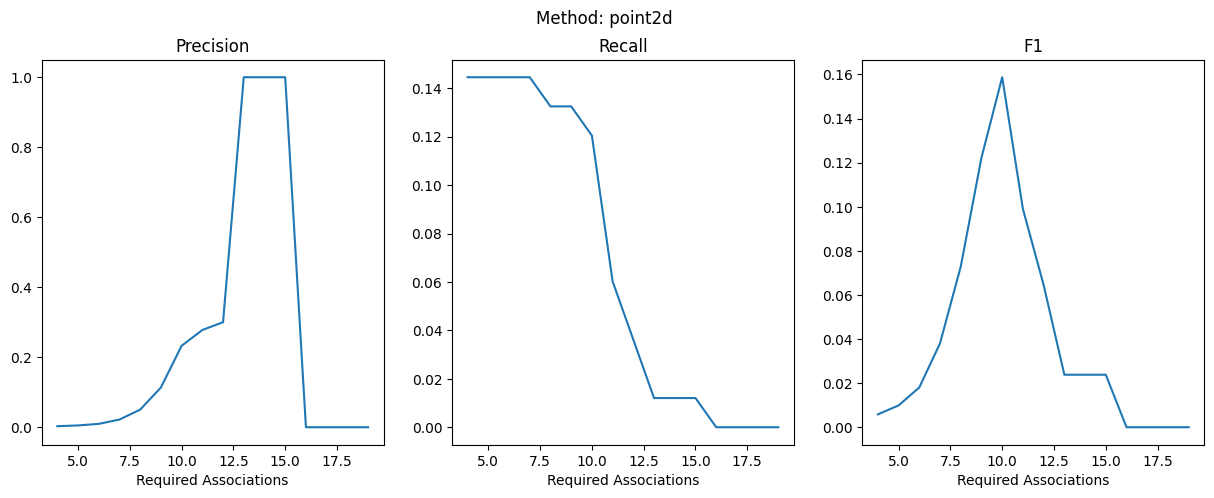

Method: point3d
Best F1: 0.12598425196850394 at 10 associations


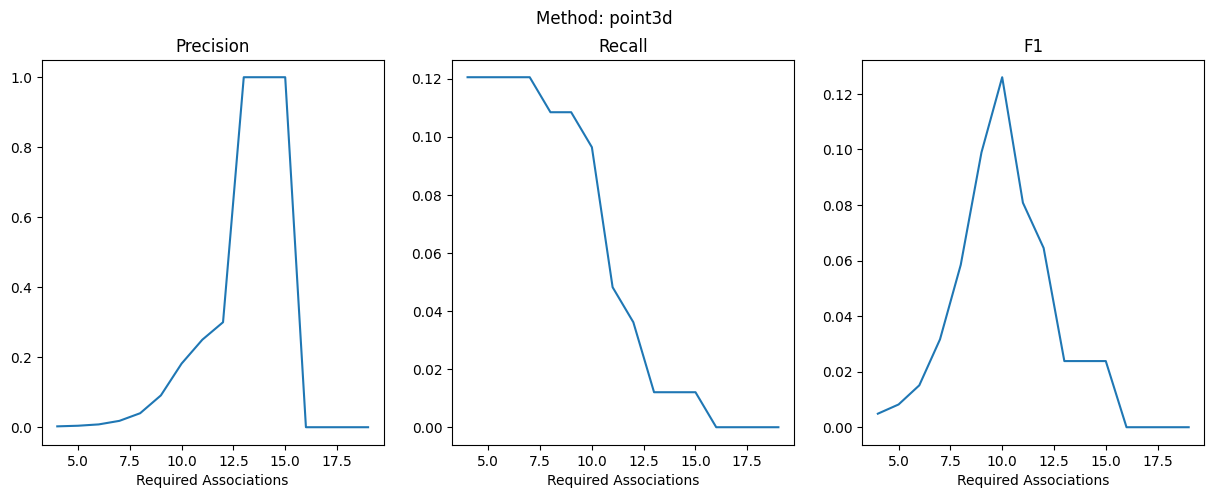

Method: vol2d
Best F1: 0.18 at 7 associations


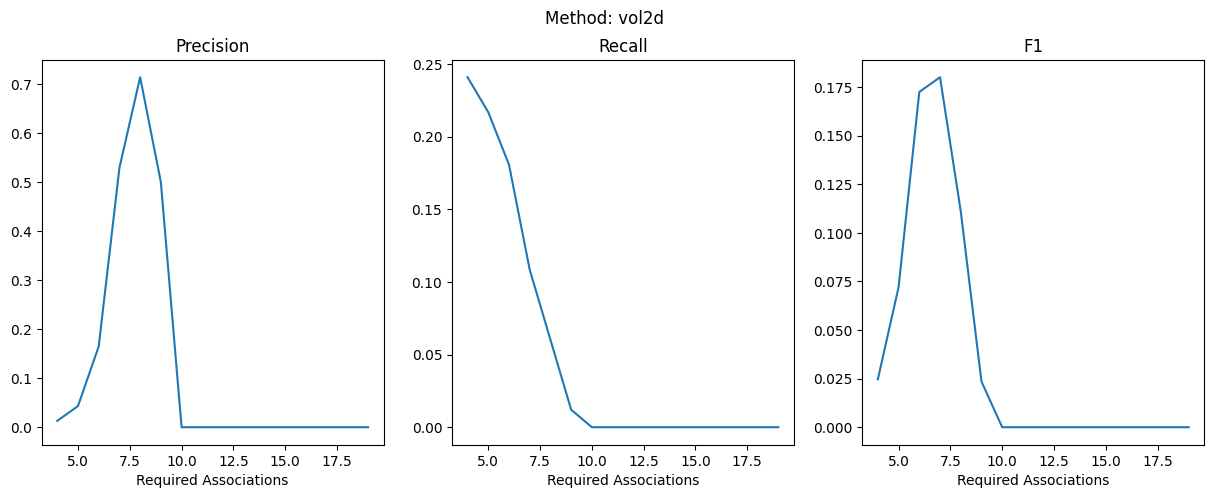

Method: vol3d
Best F1: 0.16 at 7 associations


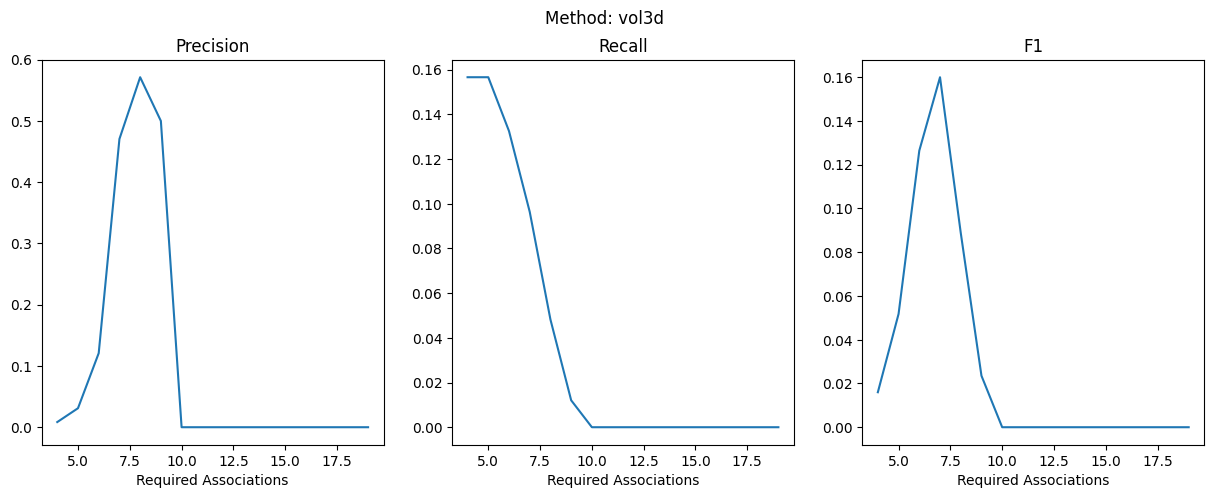

Method: volgrav
Best F1: 0.2807017543859649 at 5 associations


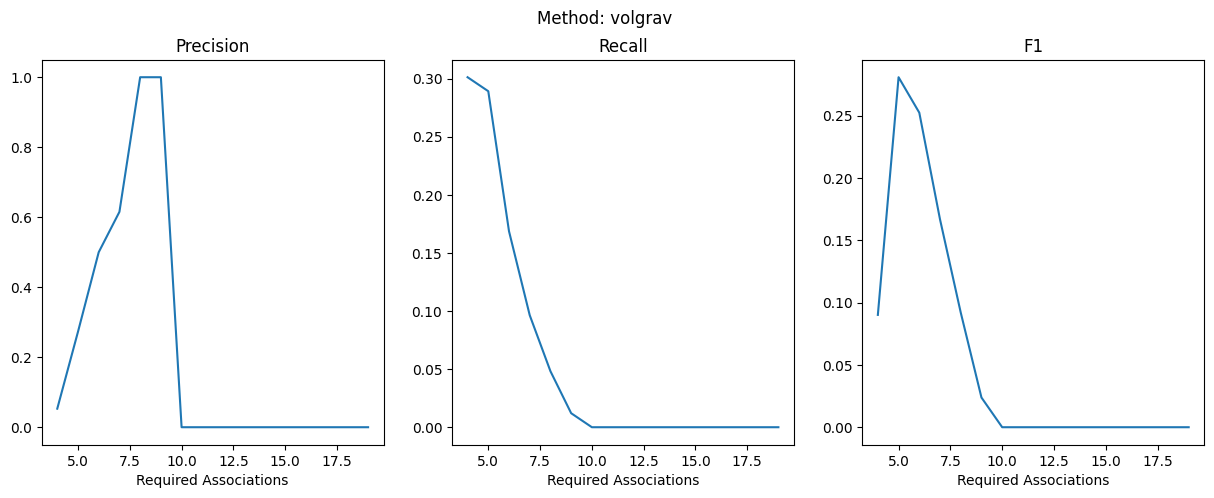

In [12]:
for method in methods:
    try:
        precisions, recalls, f1s, assoc_reqs = prf1_sweep(f"{results_dir}/{method}.pkl", req_overlap=req_overlap)
    except OSError as e:
        continue
    print(f"Method: {method}")
    print(f"Best F1: {f1s[np.argmax(f1s)]} at {assoc_reqs[np.argmax(f1s)]} associations")
    fig = plt.gcf()
    fig.suptitle(f"Method: {method}")
    plt.show()
    